In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

Load in the NAO recordings from 1950 - present.

Load in the ERA5 reanalysis data for sea surface temperature from 1981 - 2010, aswell as 2017 - 2022.

In [12]:
NAO = np.loadtxt('C:/Users/durka/Downloads/Thesis_Data/NAO.txt')
ERA5 = xr.open_dataset('C:/Users/durka/Downloads/Thesis_Data/ERA5.nc')

Load in the biases of each location and calculate the average.

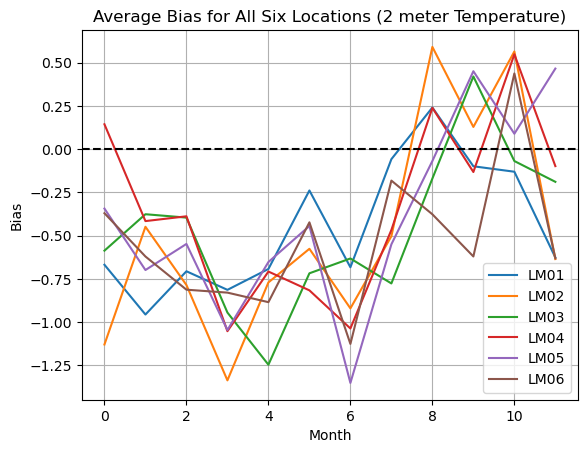

In [15]:
%store -r bias_DUB
%store -r bias_CORK
%store -r bias_BEL
%store -r bias_VAL
%store -r bias_MAL
%store -r bias_MUL

bias_avg = (bias_DUB + bias_CORK + bias_BEL + bias_VAL + bias_MAL + bias_MUL) / 6

for LM in range(6):
    plt.plot(bias_avg[LM,:])
      
leadtime = ['LM01', 'LM02', 'LM03', 'LM04', 'LM05', 'LM06']

plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(leadtime)
plt.title("Average Bias for All Six Locations (2 meter Temperature)")
plt.xlabel("Month")
plt.ylabel("Bias")
plt.show()

Plot the NAO from 2017 - 2021. Each vertical red line indicates the next January.

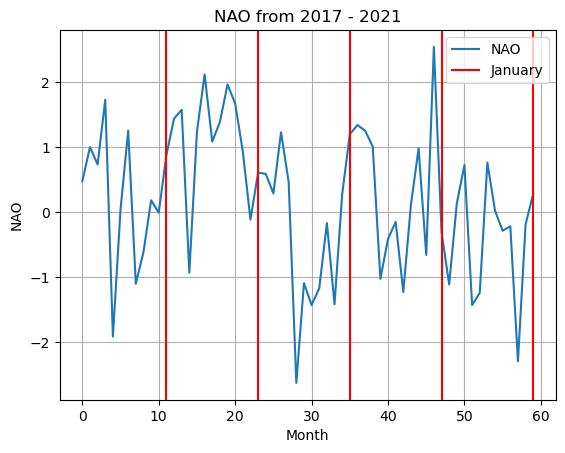

In [22]:
x = np.arange(0,60,1)

plt.plot(x, NAO[804:864,2])
plt.grid()
for i in range(5):
    plt.axvline(x=((i+1)*12-1), color='red')
plt.title('NAO from 2017 - 2021')
plt.xlabel('Month')
plt.ylabel('NAO')
plt.legend(['NAO','January'])
plt.show()

Climatology period for ERA5 SST data (1981-2010):

In [30]:
SST_avg = ERA5.sst[:360,:,:].groupby('time.month').mean(dim='time')

Extracting the region surrounding Ireland:

In [32]:
SST_avg[:,14:37,36:61]

<xarray.DataArray 'sst' (month: 12, latitude: 23, longitude: 25)>
array([[[283.0864 , 283.08026, 283.0751 , ...,       nan,       nan,
               nan],
        [283.1343 , 283.13132, 283.12543, ..., 280.88644,       nan,
               nan],
        [283.17725, 283.16586, 283.1592 , ...,       nan,       nan,
               nan],
        ...,
        [283.95462, 283.71005, 283.39468, ..., 282.87384, 282.60895,
         282.2458 ],
        [284.1389 , 283.95963, 283.68332, ..., 283.00818, 282.77258,
         282.53693],
        [284.3    , 284.15826, 283.93475, ..., 283.1301 , 282.92673,
         282.71796]],

       [[282.9418 , 282.9335 , 282.91434, ...,       nan,       nan,
               nan],
        [282.97473, 282.968  , 282.9575 , ..., 279.90726,       nan,
               nan],
        [282.99664, 282.98547, 282.97418, ...,       nan,       nan,
               nan],
...
        [285.42188, 285.25275, 285.07626, ..., 285.9415 , 285.96332,
         285.87262],
        [285.6205 , 285.4415 , 285.2529 , ..., 286.0272 , 286.0743 ,
         286.09354],
        [285.8217 , 285.662  , 285.46774, ..., 286.01233, 286.09198,
         286.145  ]],

       [[283.57974, 283.57324, 283.56445, ...,       nan,       nan,
               nan],
        [283.62885, 283.6236 , 283.61322, ..., 282.2463 ,       nan,
               nan],
        [283.67303, 283.65536, 283.6437 , ...,       nan,       nan,
               nan],
        ...,
        [284.4264 , 284.20032, 283.9572 , ..., 284.3097 , 284.14944,
         283.87714],
        [284.63217, 284.43192, 284.18396, ..., 284.39484, 284.26474,
         284.12027],
        [284.8293 , 284.66165, 284.4321 , ..., 284.42233, 284.31183,
         284.18625]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -11.0 -10.75 -10.5 -10.25 ... -5.5 -5.25 -5.0
  * latitude   (latitude) float32 56.5 56.25 56.0 55.75 ... 51.5 51.25 51.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Monthly means of area surrounding Ireland:

In [33]:
SST_avg[:,14:37,36:61].mean(dim=['latitude','longitude'])

<xarray.DataArray 'sst' (month: 12)>
array([282.60883, 282.0265 , 281.79663, 282.34775, 283.76648, 285.70016,
       287.3611 , 288.1985 , 287.62222, 286.3409 , 284.874  , 283.58975],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Repeat this 5 times to obtain 60 months

In [34]:
SST_avg_repeated = np.array(xr.concat([SST_avg[:,14:37,36:61].mean(dim=['latitude','longitude'])]*5, dim='month'))

In [38]:
SST_observed_LM01 = ERA5.sst[360:420,:,:]
SST_LM01 = np.array(SST_observed_LM01[:,14:37,36:61].mean(dim=['latitude','longitude']))

SST_observed_LM02 = ERA5.sst[361:421,:,:]
SST_LM02 = np.array(SST_observed_LM02[:,14:37,36:61].mean(dim=['latitude','longitude']))

SST_observed_LM03 = ERA5.sst[362:422,:,:]
SST_LM03 = np.array(SST_observed_LM03[:,14:37,36:61].mean(dim=['latitude','longitude']))

SST_observed_LM04 = ERA5.sst[363:423,:,:]
SST_LM04 = np.array(SST_observed_LM04[:,14:37,36:61].mean(dim=['latitude','longitude']))

SST_observed_LM05 = ERA5.sst[364:424,:,:]
SST_LM05 = np.array(SST_observed_LM05[:,14:37,36:61].mean(dim=['latitude','longitude']))

SST_observed_LM06 = ERA5.sst[365:425,:,:]
SST_LM06 = np.array(SST_observed_LM06[:,14:37,36:61].mean(dim=['latitude','longitude']))

SST = np.vstack((SST_LM01, SST_LM02, SST_LM03, SST_LM04, SST_LM05, SST_LM06))

In [39]:
SST_anom = np.zeros([6,60])

for i in range(6):
    SST_anom[i,:] = SST[i] - np.roll(SST_avg_repeated, -i)

In [59]:
%store -r OBS_data
%store -r FC_data

bias = OBS_data - FC_data
bias

<xarray.DataArray (leadtime: 6, time: 72)>
array([[ 2.17374681e+00,  1.97307478e-01,  1.50999067e+00,
         8.77045898e-01,  1.31412373e+00, -9.76373698e-01,
        -2.51711938e-01,  1.20188658e-01, -7.54261068e-01,
         8.00421143e-01, -4.58260091e-02,  4.07939886e-01,
         6.21059295e-01,  9.21406773e-01, -7.44585591e-02,
         1.58141805e+00,  1.24841387e+00,  3.49960938e-01,
        -1.54881474e+00, -9.52963749e-01, -1.14537354e+00,
        -1.39434716e+00,  5.77200928e-01,  1.25682983e+00,
         2.08393791e+00,  4.35504150e+00,  8.04403391e-01,
         2.11281779e+00,  5.13988076e-01, -4.96913249e-01,
         5.96204007e-01,  1.12702597e-01,  5.73020020e-01,
        -1.16548403e-01, -7.52878825e-01,  4.04371495e-01,
         4.35807751e-01,  2.76912716e-01,  3.71055554e-01,
         1.18197266e+00,  2.50152903e+00,  3.94667155e-01,
        -7.42869322e-01,  7.02179743e-01, -5.23238932e-01,
         7.41046339e-01,  1.01933553e+00,  2.22630655e-01,
        -1.23085268e-01,  4.54221017e-01,  1.39354071e+00,
         2.03597778e+00,  1.21832295e+00, -8.21852620e-01,
         1.76141436e+00,  5.77439437e-01,  5.51819255e-01,
         3.51943084e-01,  1.34516154e+00,  1.80362431e+00,
...
        -4.49375276e-01, -1.89274118e+00, -1.26644464e+00,
         1.81213094e+00,  1.45324786e+00,  6.14517822e-01,
        -8.55579007e-02, -5.18759647e-01, -1.14119263e+00,
        -4.99815910e-01, -1.78658447e-01,  2.55816040e+00,
         1.62840202e+00,  4.30059814e+00,  2.66115388e+00,
         2.14470866e+00,  1.15003544e+00, -8.15089518e-01,
        -1.05212009e-01,  1.08758663e+00,  1.07894043e+00,
        -5.05067690e-01, -1.07166545e+00, -4.18748622e-01,
         1.41771083e+00,  2.94796016e-01,  9.07310437e-01,
         1.64120117e+00,  2.35058909e+00, -7.60664876e-02,
        -7.83488218e-01, -1.64178388e+00,  6.47262777e-01,
         4.71393019e-01, -4.33881022e-01,  3.77995645e-01,
        -1.28003717e+00, -8.09694999e-01,  2.97844061e+00,
         1.48598999e+00,  3.32338395e-02,  2.02225749e-01,
         2.64096148e+00,  1.13713182e+00,  3.22510173e-01,
         1.28315646e+00,  5.46486003e-01,  1.38638798e+00,
         2.90394760e+00,  2.58811646e+00,  1.46541512e+00,
         2.00348999e+00,  1.59006820e+00,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan]])
Coordinates:
  * leadtime  (leadtime) <U5 'LM01' 'LM02' 'LM03' ' LM04' 'LM05' 'LM06'
  * time      (time) datetime64[ns] 2017-01-01 2017-02-01 ... 2022-12-01

In [60]:
np.shape(bias)

(6, 72)

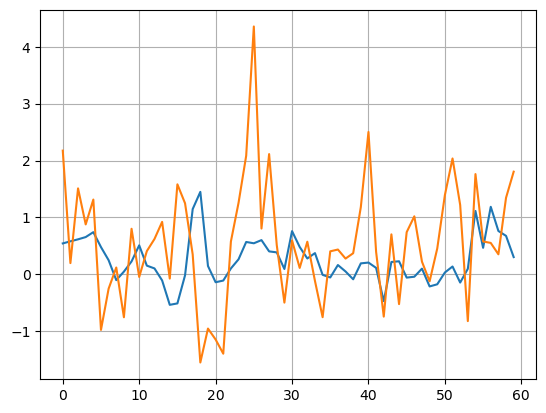

In [61]:
plt.plot(x, SST_anom[0])
plt.plot(x, bias[0,:60])
plt.grid()

In [67]:
corr_NAO = np.zeros(6)

for i in range(6):
    corr_NAO[i] = np.corrcoef(NAO[804+i:864+i,2], bias[i,i:60+i])[0,1]

In [68]:
corr_NAO

array([-0.04704911,  0.09304788,  0.12423084,  0.1496187 , -0.11760862,
        0.07215101])

In [64]:
corr_SST = np.zeros(6)

for i in range(6):
    corr_SST[i] = np.corrcoef(SST_anom[i,:], bias[i,i:60+i])[0,1]

In [65]:
corr_SST

array([0.15167626, 0.34825917, 0.33762889, 0.39867467, 0.43983995,
       0.39574235])